Along **`Practical Statistics for Data Scientists`** book 

Chapter 3 : Statistical Experiments and Significance Testing

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample

import os
import random

In [11]:
def populate_data(filename) :
    data_path = os.path.join(os.getcwd(), 'data') + '/' + filename
    df = pd.read_csv(data_path)
    print(df.info())
    print(df.head())
    return df

## Resampling
Boostrapping and Permutation test

- Bootstrapping : estimate the sampling distribution of a statistic or parameters by replicating samples with replacement n repeating times - not compensate for a small sample size nor create a new data but powerful tool for assessing the variability of a sample statistic 
- Permutation test : multiple samples are combined and the sampling may be done without replacement

In [14]:
loans_income = populate_data('loans_income.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       50000 non-null  int64
dtypes: int64(1)
memory usage: 390.8 KB
None
        x
0   67000
1   52000
2  100000
3   78762
4   37041


### Bootstrapping

In [15]:
results = []
for nrepeats in range(1000) :
    boot_sample = resample(loans_income, replace=True)
    results.append(boot_sample.median())

In [18]:
results = pd.Series(results)
results.shape

(1000,)

In [43]:
print('Bootstrap statistics : ')
print(f'Original: {loans_income.iloc[:,0].median()}')
print(f'bias: {results.mean() - loans_income.iloc[:,0].median()}')
print(f'std err: {results.std()}')

Bootstrap statistics : 
Original: 62000.0
bias: -63.95350000000326
std err: 201.0323944327415


The original estimate of the median is \\$62000. The boostrap distribution incidates that the estimate has a bias of about -\\$64 and a standard error of \\$209.

### Permutation Test
Practice with Web Stickiness example 

_A company wants to test which of two web presentations creates a better sales. Due to high value of the server being sold, sales are infrequent and the sales cycle is long; so the company will go with the results with a proxy variable. A selected metric is average session time, comparing page A to page B. The result is a total of 36 sessions for the two different presentations : 21 for page A and 15 for page B._

In [47]:
sessions_pages = populate_data('web_page_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Page    36 non-null     object 
 1   Time    36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes
None
     Page  Time
0  Page A  0.21
1  Page B  2.53
2  Page A  0.35
3  Page B  0.71
4  Page A  0.67


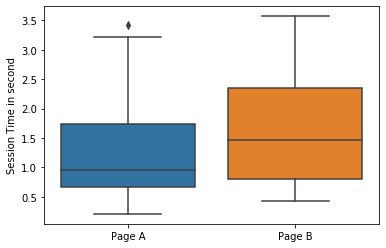

In [60]:
ax=sns.boxplot(data=sessions_pages, x='Page', y='Time')
ax.set_xlabel('')
ax.set_ylabel('Session Time in second')
plt.show()

In [62]:
mean_page_a = sessions_pages.query('Page=="Page A"').mean()
mean_page_b = sessions_pages.query('Page=="Page B"').mean()

In [89]:
obs_diff = (mean_page_b - mean_page_a)[0]
obs_diff

0.3566666666666669

The boxplot shows that page B held long sessions than page A. 0.35 more seconds on average.
So next is to confirm is the difference is statistically significant - by doing a permutation test.

how : combine all the session times together and then repeatedly shuffle. Divide them into a group of 21 (page A) and a group of 15 (page B).

In [75]:
def perm_test_two(x, nA, nB) :
    n = nA + nB
    idx_A = set(random.sample(range(n), nA))
    idx_B = set(range(n)) - idx_A
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

In [76]:
perm_diff = [perm_test_two(sessions_pages.Time, 21, 15) for _ in range(1000)]

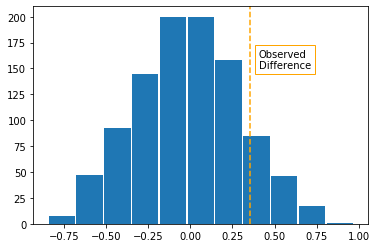

In [113]:
plt.hist(perm_diff, bins=11, rwidth=0.95)
plt.axvline(x=obs_diff, color='orange', ls='--')
plt.text(x=obs_diff+0.05, y=150, s='Observed\nDifference', 
         bbox={'facecolor':'white', 'edgecolor': 'orange'})
plt.show()

In [117]:
np.mean(perm_diff > obs_diff) 

0.115

11.5% chance that the mean difference of random permutations exceeds the observed difference in session time. This suggests that the observed difference between page A and B is within the range of chance variation and is not statistically significant.